# Comparison of CVO-QRAM using different multi-controlled gate implementations
### Section 4 (Figure 12)

In [ ]:
import matplotlib.pyplot as plt
import qiskit

from qclib.state_preparation import CvoqramInitialize
from qclib.util import double_sparse

In [2]:
# Number of nonzero amplitudes = $2^s$
# p = probability of 1s in binary strings

n_qubits = [6, 7, 8, 9, 10, 11, 12]
s = 4
p = 0.2
repetitions = 30

In [3]:
use_aux = False

cnots_cvoqram = []
cnots_cvoqram_linear = []
cnots_cvoqram_barenco = []
for n in n_qubits:
    cx_cvoqram = 0
    cx_cvoqram_linear = 0
    cx_cvoqram_barenco = 0
    for k in range(repetitions):
        data = double_sparse(n, s, p)

        qc_cvoqram = CvoqramInitialize(data, opt_params={'with_aux':False, 'mcg_method':'qiskit'}).definition
        qc_cvoqram_linear = CvoqramInitialize(data, opt_params={'with_aux':False, 'mcg_method':'linear'}).definition
        qc_cvoqram_barenco = CvoqramInitialize(data, opt_params={'with_aux':False, 'mcg_method':'barenco'}).definition

        qc_cvoqram = qiskit.transpile(qc_cvoqram, basis_gates=['u','cx'], optimization_level=0)
        qc_cvoqram_linear = qiskit.transpile(qc_cvoqram_linear, basis_gates=['u','cx'], optimization_level=0)
        qc_cvoqram_barenco = qiskit.transpile(qc_cvoqram_barenco, basis_gates=['u','cx'], optimization_level=0)

        cx_cvoqram = cx_cvoqram + qc_cvoqram.count_ops()['cx']
        cx_cvoqram_linear = cx_cvoqram_linear + qc_cvoqram_linear.count_ops()['cx']
        cx_cvoqram_barenco = cx_cvoqram_barenco + qc_cvoqram_barenco.count_ops()['cx']

    cnots_cvoqram.append(cx_cvoqram / repetitions)
    cnots_cvoqram_linear.append(cx_cvoqram_linear / repetitions)
    cnots_cvoqram_barenco.append(cx_cvoqram_barenco / repetitions)

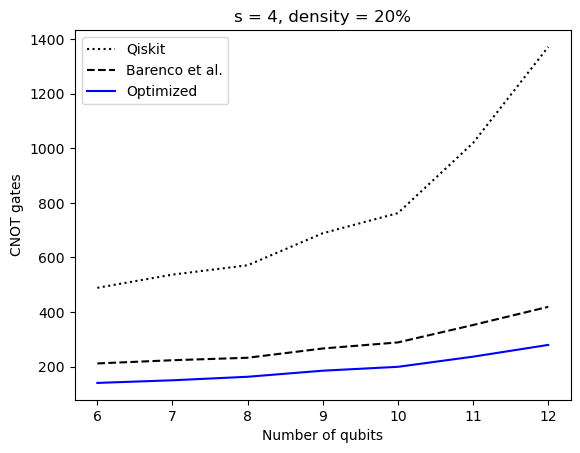

In [5]:
plt.plot(n_qubits, cnots_cvoqram, color='black', linestyle=':', label='Qiskit')
plt.plot(n_qubits, cnots_cvoqram_barenco, color='black', linestyle='--', label='Barenco et al.')
plt.plot(n_qubits, cnots_cvoqram_linear, color='blue', label='Optimized')
plt.xlabel('Number of qubits')
plt.ylabel('CNOT gates')
plt.title('s = {}, density = {}%'.format(s, int(p*100)))
plt.legend()
plt.show()